Matplotlib中也能支持一些基础的3D图表，比如曲面图，散点图和柱状图。这些3D图表需要使用mpl_toolkits模块

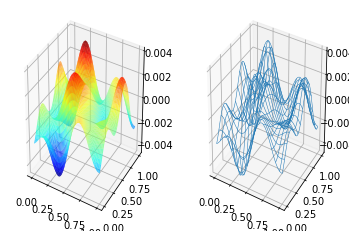

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# 3D图标必须的模块，project='3d'的定义
from mpl_toolkits.mplot3d import Axes3D     

np.random.seed(42)

n_grids = 51        	# x-y平面的格点数 
c = n_grids / 2     	# 中心位置
nf = 2              	# 低频成分的个数

# 生成格点
x = np.linspace(0, 1, n_grids)
y = np.linspace(0, 1, n_grids)

# x和y是长度为n_grids的array
# meshgrid会把x和y组合成n_grids*n_grids的array，X和Y对应位置就是所有格点的坐标
X, Y = np.meshgrid(x, y)

# 生成一个0值的傅里叶谱
spectrum = np.zeros((n_grids, n_grids), dtype=np.complex)

# 生成一段噪音，长度是(2*nf+1)**2/2
noise = [np.complex(x, y) for x, y in np.random.uniform(-1,1,((2*nf+1)**2//2, 2))]

# 傅里叶频谱的每一项和其共轭关于中心对称
noisy_block = np.concatenate((noise, [0j], np.conjugate(noise[::-1])))

# 将生成的频谱作为低频成分
spectrum[int(c-nf):int(c+nf+1), int(c-nf):int(c+nf+1)] = noisy_block.reshape((2*nf+1, 2*nf+1))

# 进行反傅里叶变换
Z = np.real(np.fft.ifft2(np.fft.ifftshift(spectrum)))

# 创建图表
fig = plt.figure('3D surface & wire')

# 第一个子图，surface图
ax = fig.add_subplot(1, 2, 1, projection='3d')

# alpha定义透明度，cmap是color map
# rstride和cstride是两个方向上的采样，越小越精细，lw是线宽
ax.plot_surface(X, Y, Z, alpha=0.7, cmap='jet', rstride=1, cstride=1, lw=0)

# 第二个子图，网线图
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=3, cstride=3, lw=0.5)

plt.show()

这个例子中先生成一个所有值均为0的复数array作为初始频谱，然后把频谱中央部分用随机生成，但同时共轭关于中心对称的子矩阵进行填充。这相当于只有低频成分的一个随机频谱。最后进行反傅里叶变换就得到一个随机波动的曲面，图像如下：

3D的散点图也是常常用来查看空间样本分布的一种手段，并且画起来比表面图和网线图更加简单，

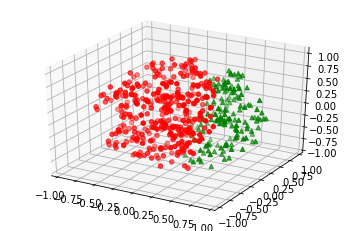

In [12]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)

# 采样个数500
n_samples = 500
dim = 3

# 先生成一组3维正态分布数据，数据方向完全随机
samples = np.random.multivariate_normal(
    np.zeros(dim),
    np.eye(dim),
    n_samples
)

# 通过把每个样本到原点距离和均匀分布吻合得到球体内均匀分布的样本
for i in range(samples.shape[0]):
    r = np.power(np.random.random(), 1.0/3.0)
    samples[i] *= r / np.linalg.norm(samples[i])

upper_samples = []
lower_samples = []

for x, y, z in samples:
    # 3x+2y-z=1作为判别平面
    if z > 3*x + 2*y - 1:
        upper_samples.append((x, y, z))
    else:
        lower_samples.append((x, y, z))

fig = plt.figure('3D scatter plot')
ax = fig.add_subplot(111, projection='3d')

uppers = np.array(upper_samples)
lowers = np.array(lower_samples)

# 用不同颜色不同形状的图标表示平面上下的样本
# 判别平面上半部分为红色圆点，下半部分为绿色三角
ax.scatter(uppers[:, 0], uppers[:, 1], uppers[:, 2], c='r', marker='o')
ax.scatter(lowers[:, 0], lowers[:, 1], lowers[:, 2], c='g', marker='^')

plt.show()

为了方便，直接先采样了一堆3维的正态分布样本，保证方向上的均匀性。然后归一化，让每个样本到原点的距离为1，相当于得到了一个均匀分布在球面上的样本。再接着把每个样本都乘上一个均匀分布随机数的开3次方，这样就得到了在球体内均匀分布的样本，最后根据判别平面3x+2y-z-1=0对平面两侧样本用不同的形状和颜色画出